In [30]:
import pandas as pd

# Data import
with pd.HDFStore('MiningProcess_Flotation_Plant_Database_train_split.h5') as store:
    X_cal = store.get('X_cal')
    Y_cal = store.get('Y_cal')
    X_test = store.get('X_test')
    Y_test = store.get('Y_test')


# TEMPLATE for model usage and calibration

In [31]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error


def optimise_pls_cv(X, y, n_comp):

    model = make_pipeline(StandardScaler(),PLSRegression(n_components=n_comp)) # Pipeline ensures scaling compatibility with crossval
    y_cv = cross_val_predict(model, X, y, cv=5)

    mse = mean_squared_error(y, y_cv)

    tss = np.sum((y - np.mean(y)) ** 2)
    press = np.sum((y - y_cv) ** 2)
    q2 = 1 - press / tss

    
    return (y_cv, q2, mse,)


y_cv,q2,mse = optimise_pls_cv(X_cal,Y_cal,10)



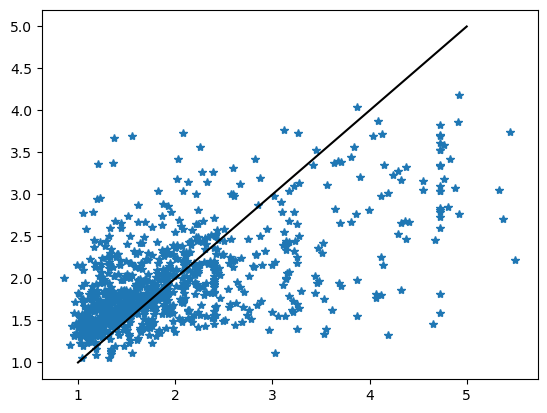

In [32]:
import matplotlib.pyplot as plt

plt.plot(Y_cal,y_cv,'*')
plt.plot([1,5],[1,5],'k')

# Template for testing

In [34]:
## After choosing No. LVs and variables
## X_cal should now only included wanted variables

n_comp = 7 # Replace with best value

scaler = StandardScaler()

X_cal_norm = scaler.fit_transform(X_cal) # this saves mean and std to scaler 

model = PLSRegression(n_components=n_comp)

model.fit(X_cal_norm,Y_cal) # Calculate pls model for calibration data

## predict

X_test_norm = scaler.transform(X_test) # this uses previously computed mean and std
Y_pred = model.predict(X_test_norm) # Calculate test data with precalculated model

# model parameters can be accessed for example
loadings = model.x_loadings_
